<a href="https://colab.research.google.com/github/irahanjose/Aprendizaje-de-M-quina-con-Python/blob/main/Parte0_Practica2_NoteBook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clasificación**

En esta práctica clasificaremos flores 3 tipos de flores Iris, en función de las medidas de su sépalo y pétalo. Para clasificar usaremos árboles de decisión que son explicados a mayor detalle en el curso Cómo generar valor con aprendizaje supervisado.

Hecho con 💗 por alan@machinelearningenespanol.com

**Iniciemos** 💪

Primero, exploremos los datos. Originalmente, los datos los podemos extraer [aquí](https://archive.ics.uci.edu/ml/datasets/iris).

Yo los descargué y solo puse los nombres de las columnas en español. Están en un repositorio de [Github](https://raw.githubusercontent.com/AlanCIO/Disruptora_Lab0P2/master/iris.data). Ejecuta la siguiente celda para cargar y ver el dataset.

In [ ]:
# Almacenemos los datos en un dataframe
import pandas as pd  # Pandas ofrece estructuras de datos y operaciones para manipular tablas numéricas.
url = 'https://raw.githubusercontent.com/AlanCIO/Disruptora_Lab0P2/master/iris.data'
df = pd.read_csv(url)
df

,Longitud-del-sépalo-cm,Ancho-del-sépalo-cm,Longitud-del-pétalo-cm,Ancho-del-pétalo-cm,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Nota:** Si te diste cuenta, ahora los datos no están en un archivo separado por comas (.csv). Más bien, están en un [archivo .data](https://www.filetypeadvisor.com/es/extension/data). La estructura del archivo es muy similar al .csv. De hecho, estamos usando la misma función para cargarlos *pd.read_csv(~)*.

---
**Regresemos a nuestro problema**

Este es un problema de clasificación multiclase. Tenemos 3 clases 💐: Iris setosa, Iris virgínica e Iris versicolor.

¿Cuántos atributos tiene el dataset?

Text(0, 0.5, 'Ancho del Sépalo')

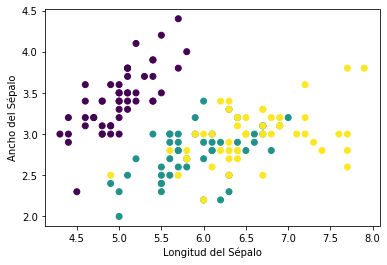

In [ ]:
import numpy as np                # Usaremos numpy para trabajar con arreglos. Pandas está basado en numpy
import matplotlib.pyplot as plt   # Usaremos pyplot para graficar y ver cómo se ven los datos
 
# Como la clasificación de flores Iris es el "Hola Mundo" del aprendizaje de máquina,
# sklearn tiene este dataset. Por simplicidad, usaremos el dataset de sklearn en lugar del dataframe que recuperamos
# de Github. No te preocupes que son exactamente los mismos datos.

from sklearn.datasets import load_iris
IrisDataset = load_iris() # Cargar los datos
X = IrisDataset.data      # X contiene los 4 atributos:longitud del sépalo,ancho del sépalo,longitud del pétalo,ancho del pétalo
y = IrisDataset.target    # y contiene las etiquetas. Como las etiquetas es el valor que se intenta aprender,
                          # también reciben el nombre de target o en español, objetivo.

# Graficar los puntos: Col 0: Longitud del sépalo, y Col 1: Ancho del sépalo
plt.scatter(X[:, 0], X[:, 1], c=y) # x[renglon,columna] Cuando coloco : se selecciona todo, ya sea renglon o columna
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')

Para visualizar mejor 👀, hemos graficado solo dos atributos. Por eso vemos la gráfica en dos dimensiones. ¿Cómo podríamos visualizar los 4 atributos? ¿Es posible graficar en cuatro dimensiones? :O.

Grafiquemos otro par de atributos.

Text(0, 0.5, 'Longitud del Pétalo')

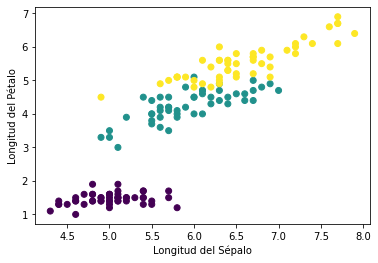

In [ ]:
plt.scatter(X[:, 0], X[:, 2], c=y)  # X[:,0] =>  Del arreglo X[:,0]
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Longitud del Pétalo')

¿Qué diferencias ves en los dos pares de atributos que graficamos?
Entrenemos un modelo para clasificar usando solo dos atributos. Veamos qué pasa.

Text(0, 0.5, 'Longitud del Pétalo')

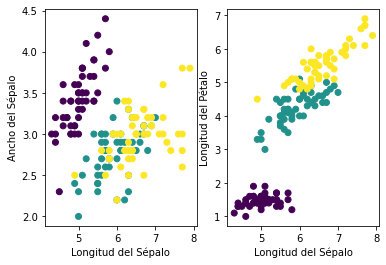

In [ ]:
# Comparar gráficas de diferentes pares de atributos
plt.subplot(121)   # Para graficar en la misma figura dos gráficas: 121 significa 1 renglón, 2 columnas, la gráfica 1
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')

plt.subplot(122)  # Para graficar en la misma figura dos gráficas: 122 significa 1 renglón, 2 columnas, la gráfica 2
plt.scatter(X[:, 0], X[:, 2], c=y)  # X[:,0] =>  Del arreglo X[:,0]
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Longitud del Pétalo')

Como recordarás, en sklearn los pasos para elegir un modelo y entrenarlos son:
1. importar el modelo de sklearn
2. crear el modelo
3. entrenar el modelo
4. **Hacer predicciones**

Agregamos uno, Hacer predicciones. Es decir intentar asignar una clase a un ejemplo nuevo.

Calificación:  0.9933333333333333


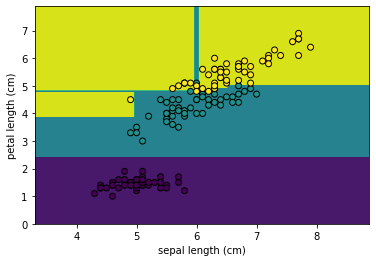

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

IrisDataset = load_iris() # Cargar los datos
X = IrisDataset.data      # X contiene los 4 atributos
y = IrisDataset.target    # y contiene las etiquetas

# Elegir dos atributos:
# 0 => Longitud del sépalo
# 1 => Ancho del sépalo
# 2 => Longitud del pétalo
# 3 => Ancho del pétalo
atributo_1 = 0
atributo_2 = 2
X = X[:,[atributo_1,atributo_2]]        # X ahora contiene solo los atributos 1 y 2 que seleccionaste

from sklearn.tree import DecisionTreeClassifier     #Importar el modelo
clf = DecisionTreeClassifier()                      # Crear el modelo
clf = clf.fit(X, y)                                 # Entrenar el modelo

# Ya que tenemos un modelo entrenado, podemos predecir.
# Grafiquemos el límite de decisión.

# Crear una malla de puntos. Después usar el modelo para predecir la
# etiqueta para cada punto de la malla. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Predicción
Z = Z.reshape(xx.shape)

# Graficar resultados
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black')
plt.xlabel(IrisDataset.feature_names[atributo_1])
plt.ylabel(IrisDataset.feature_names[atributo_2])


# Evaluar el modelo
from sklearn.metrics import accuracy_score  
y_pred = clf.predict(X)                             # Usar los ejemplos de prueba para predecir

print('Calificación: ', accuracy_score(y, y_pred))  # Comparar las predicciones con los valores
                                                    # reales de las etiquetas de prueba

**Ejercicio**

Modifica la celda de arriba para entrenar el modelo usando otro par de atributos. Por ejemplo, usa el ancho del sépalo y la longitud del pétalo ¿Mejoró la calificación? Sí, no ¿Por qué? 🤔

¿Qué combinación de atributos usando qué clasificador te dió la mejor calificación?

Por ejemplo, ¿qué es mejor:

*   un árbol de decisión con ancho del sépalo y lóngitud del pétalo?
*   una máquina de vectores de soporte con la longitud del sépalo y el ancho del pétalo?



Calificación:  0.96


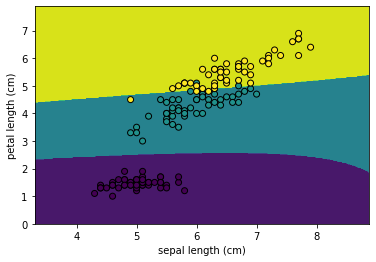

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

IrisDataset = load_iris() # Cargar los datos
X = IrisDataset.data      # X contiene los 4 atributos
y = IrisDataset.target    # y contiene las etiquetas

# Elegir dos atributos:
# 0 => Longitud del sépalo
# 1 => Ancho del sépalo
# 2 => Longitud del pétalo
# 3 => Ancho del pétalo
atributo_1 = 0
atributo_2 = 2
X = X[:,[atributo_1,atributo_2]]        # X ahora contiene solo los atributos 1 y 2 que seleccionaste

from sklearn.svm import SVC    # Importar el modelo
clf = SVC()                      # Crear el modelo
clf = clf.fit(X, y)                                 # Entrenar el modelo

# Ya que tenemos un modelo entrenado, podemos predecir.
# Grafiquemos el límite de decisión.

# Crear una malla de puntos. Después usar el modelo para predecir la
# etiqueta para cada punto de la malla. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Predicción
Z = Z.reshape(xx.shape)

# Graficar resultados
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black')
plt.xlabel(IrisDataset.feature_names[atributo_1])
plt.ylabel(IrisDataset.feature_names[atributo_2])


# Evaluar el modelo
from sklearn.metrics import accuracy_score  
y_pred = clf.predict(X)                             # Usar los ejemplos de prueba para predecir

print('Calificación: ', accuracy_score(y, y_pred))  # Comparar las predicciones con los valores
                                                    # reales de las etiquetas de prueba